<a href="https://colab.research.google.com/github/amanjain252002/Stock-Price-Prediction/blob/main/Deep_Learning_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [122]:
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import tensorflow as tf
from sklearn.metrics import mean_squared_error, mean_absolute_error

import warnings
warnings.filterwarnings('ignore')

In [123]:
Gold = pd.read_csv("./1stJan2017 - 11thNov2024/format 3/Pre_Processed_Gold.csv")


### Data Proprocessing

In [124]:
def Dataset(Data, Date):

  Train_Data = Data['Adj. Close'][Data['Date'] < Date].to_numpy()
  Data_Train = []
  Data_Train_X = []
  Data_Train_Y = []
  for i in range(0, len(Train_Data), 5):
    try:
      Data_Train.append(Train_Data[i : i + 5])
    except:
      pass

  if len(Data_Train[-1]) < 5:
    Data_Train.pop(-1)
  
  Data_Train_X = Data_Train[0 : -1]
  Data_Train_X = np.array(Data_Train_X)
  Data_Train_X = Data_Train_X.reshape((-1, 5, 1))
  Data_Train_Y = Data_Train[1 : len(Data_Train)]
  Data_Train_Y = np.array(Data_Train_Y)
  Data_Train_Y = Data_Train_Y.reshape((-1, 5, 1))


  Test_Data = Data['Adj. Close'][Data['Date'] >= Date].to_numpy()
  Data_Test = []
  Data_Test_X = []
  Data_Test_Y = []
  for i in range(0, len(Test_Data), 5):
    try:
      Data_Test.append(Test_Data[i : i + 5])
    except:
      pass

  if len(Data_Test[-1]) < 5:
    Data_Test.pop(-1)
  
  Data_Test_X = Data_Test[0 : -1]
  Data_Test_X = np.array(Data_Test_X)
  Data_Test_X = Data_Test_X.reshape((-1, 5, 1))
  Data_Test_Y = Data_Test[1 : len(Data_Test)]
  Data_Test_Y = np.array(Data_Test_Y)
  Data_Test_Y = Data_Test_Y.reshape((-1, 5, 1))

  return Data_Train_X, Data_Train_Y, Data_Test_X, Data_Test_Y

### Model

In [125]:
def Model():
  model = tf.keras.models.Sequential([
                                      tf.keras.layers.LSTM(200, input_shape = (5, 1), activation = tf.nn.leaky_relu, return_sequences = True),
                                      tf.keras.layers.LSTM(200, activation = tf.nn.leaky_relu),
                                      tf.keras.layers.Dense(200, activation = tf.nn.leaky_relu),
                                      tf.keras.layers.Dense(100, activation = tf.nn.leaky_relu),
                                      tf.keras.layers.Dense(50, activation = tf.nn.leaky_relu),
                                      tf.keras.layers.Dense(5, activation = tf.nn.leaky_relu)
                                      ])
  return model

In [126]:
model = Model()

In [127]:
tf.keras.utils.plot_model(model, show_shapes=True)

You must install pydot (`pip install pydot`) for `plot_model` to work.


In [128]:
model.summary()

Model: "sequential_8"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_16 (LSTM)                  │ (None, 5, 200)         │       161,600 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_17 (LSTM)                  │ (None, 200)            │       320,800 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_32 (Dense)                │ (None, 200)            │        40,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_33 (Dense)                │ (None, 100)            │        20,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_34 (Dense)                │ (None, 50)             │         5,050 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_35 (Dense)                │ (None, 5)              │           255 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 548,005 (2.09 MB)

 Trainable params: 548,005 (2.09 MB)

 Non-trainable params: 0 (0.00 B)

### Custom Learning Rate

In [129]:
def scheduler(epoch):
  
  if epoch <= 150:
    lrate = (10 ** -5) * (epoch / 150) 
  elif epoch <= 400:
    initial_lrate = (10 ** -5)
    k = 0.01
    lrate = initial_lrate * math.exp(-k * (epoch - 150))
  else:
    lrate = (10 ** -6)
  
  return lrate

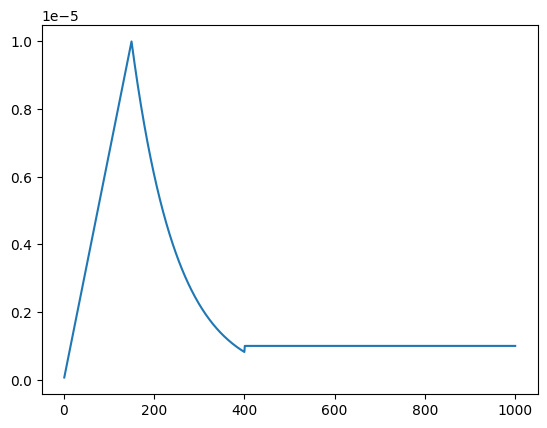

In [130]:
epochs = [i for i in range(1, 1001, 1)]
lrate = [scheduler(i) for i in range(1, 1001, 1)]
plt.plot(epochs, lrate)

In [131]:
callback = tf.keras.callbacks.LearningRateScheduler(scheduler)

#Apple

In [132]:
Gold.head()

,Date,Close,Open,High,Low,Volume,Change %,Adj. Close
0,2024-11-11,2620.20,2684.81,2686.51,2610.62,NaN,-2.37%,2620.20
1,2024-11-08,2683.77,2707.37,2710.51,2680.36,NaN,-0.86%,2683.77
2,2024-11-07,2706.99,2659.37,2710.20,2643.50,NaN,1.80%,2706.99
3,2024-11-06,2659.24,2743.88,2749.81,2652.44,NaN,-3.07%,2659.24
4,2024-11-05,2743.59,2736.59,2750.06,2724.75,NaN,0.26%,2743.59


In [133]:
Gold.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2046 entries, 0 to 2045
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Date        2046 non-null   object 
 1   Close       2046 non-null   float64
 2   Open        2046 non-null   float64
 3   High        2046 non-null   float64
 4   Low         2046 non-null   float64
 5   Volume      0 non-null      float64
 6   Change %    2046 non-null   object 
 7   Adj. Close  2046 non-null   float64
dtypes: float64(6), object(2)
memory usage: 128.0+ KB


In [134]:
# Change Dtype of Date column
Gold["Date"] = pd.to_datetime(Gold["Date"])

###Split the Data into Training and Test set

    Training Period: 2017-01-01 - 2023-12-31

    Testing Period:  2024-01-01 - 2024-11-11

In [135]:
Gold_Date = '2024-01-01'
Gold_Train_X, Gold_Train_Y, Gold_Test_X, Gold_Test_Y = Dataset(Gold, Gold_Date)

### Model Fitting

In [136]:
Gold_Model = Model()

In [137]:
Gold_Model.compile(
    optimizer=tf.keras.optimizers.Adam(),
    loss='mse',
    metrics=[tf.keras.metrics.RootMeanSquaredError()]  # Wrap it in a list
)


In [138]:
Gold_hist = Gold_Model.fit(Gold_Train_X, Gold_Train_Y, epochs = 1000, validation_data = (Gold_Test_X, Gold_Test_Y), callbacks=[callback])

Epoch 1/1000
12/12 ━━━━━━━━━━━━━━━━━━━━ 6s 74ms/step - loss: 2705596.2500 - root_mean_squared_error: 1644.8190 - val_loss: 5538866.0000 - val_root_mean_squared_error: 2353.4795 - learning_rate: 0.0000e+00
Epoch 2/1000
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 2723524.0000 - root_mean_squared_error: 1650.2529 - val_loss: 5538784.5000 - val_root_mean_squared_error: 2353.4622 - learning_rate: 6.6667e-08
Epoch 3/1000
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 2668198.7500 - root_mean_squared_error: 1633.4259 - val_loss: 5538683.0000 - val_root_mean_squared_error: 2353.4407 - learning_rate: 1.3333e-07
Epoch 4/1000
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 2632061.7500 - root_mean_squared_error: 1622.3162 - val_loss: 5538579.5000 - val_root_mean_squared_error: 2353.4187 - learning_rate: 2.0000e-07
Epoch 5/1000
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 2660736.2500 - root_mean_squared_error: 1631.1586 - val_loss: 5538568.5000 - val_root_mean_squared_error: 2353.4163 - l

In [139]:
history_dict = Gold_hist.history

loss = history_dict["loss"]
root_mean_squared_error = history_dict["root_mean_squared_error"]
val_loss = history_dict["val_loss"]
val_root_mean_squared_error = history_dict["val_root_mean_squared_error"]

epochs = range(1, len(loss) + 1)

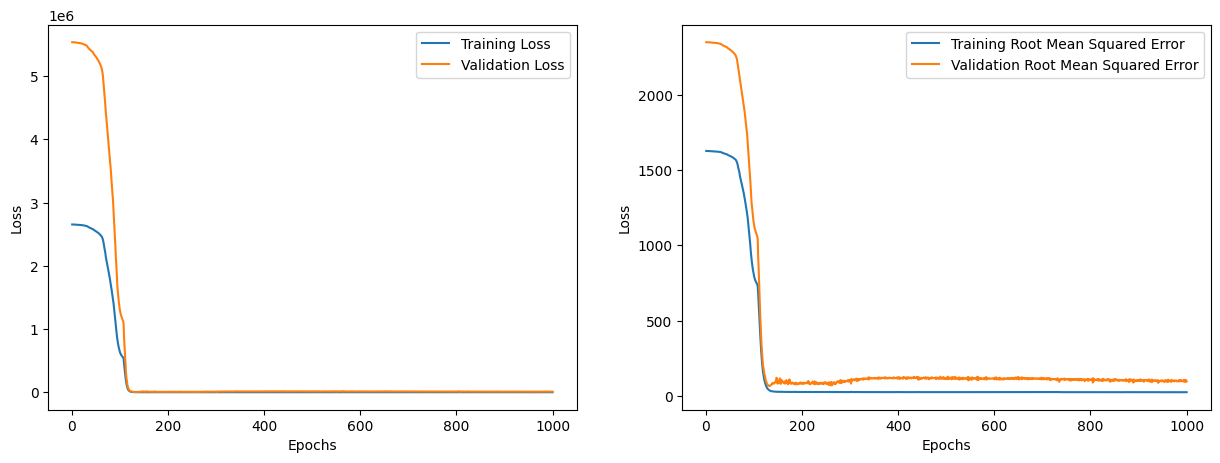

In [140]:
fig, (ax1, ax2) = plt.subplots(1, 2)

fig.set_figheight(5)
fig.set_figwidth(15)

ax1.plot(epochs, loss, label = 'Training Loss')
ax1.plot(epochs, val_loss, label = 'Validation Loss')
ax1.set(xlabel = "Epochs", ylabel = "Loss")
ax1.legend()

ax2.plot(epochs, root_mean_squared_error, label = "Training Root Mean Squared Error")
ax2.plot(epochs, val_root_mean_squared_error, label = "Validation Root Mean Squared Error")
ax2.set(xlabel = "Epochs", ylabel = "Loss")
ax2.legend()

plt.show()

### Predicting the closing stock price of Apple

In [141]:
Gold_prediction = Gold_Model.predict(Gold_Test_X)

2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 463ms/step


In [142]:
print("Shape of x (dates):", testing_dates.shape)
print("Shape of y (predictions):", Gold_prediction.shape)


Shape of x (dates): (44,)
Shape of y (predictions): (44, 5)


In [143]:
print("Shape of Gold_Test_X:", Gold_Test_X.shape)
print("Shape of Gold_prediction:", Gold_prediction.shape)


Shape of Gold_Test_X: (44, 5, 1)
Shape of Gold_prediction: (44, 5)


In [144]:
# Align dates to match predictions
testing_dates = Gold['Date'][Gold['Date'] >= '2024-01-05'].iloc[:44].reset_index(drop=True)

print("Shape of testing_dates:", testing_dates.shape)  # Should be (44,)
print("Shape of Gold_prediction:", Gold_prediction.shape)  # Should be (44, 5)


Shape of testing_dates: (44,)
Shape of Gold_prediction: (44, 5)


In [145]:
print(Gold['Date'][Gold['Date'] >= '2024-01-06'].shape)
print(Gold_prediction.reshape(-1).shape)


(220,)
(220,)


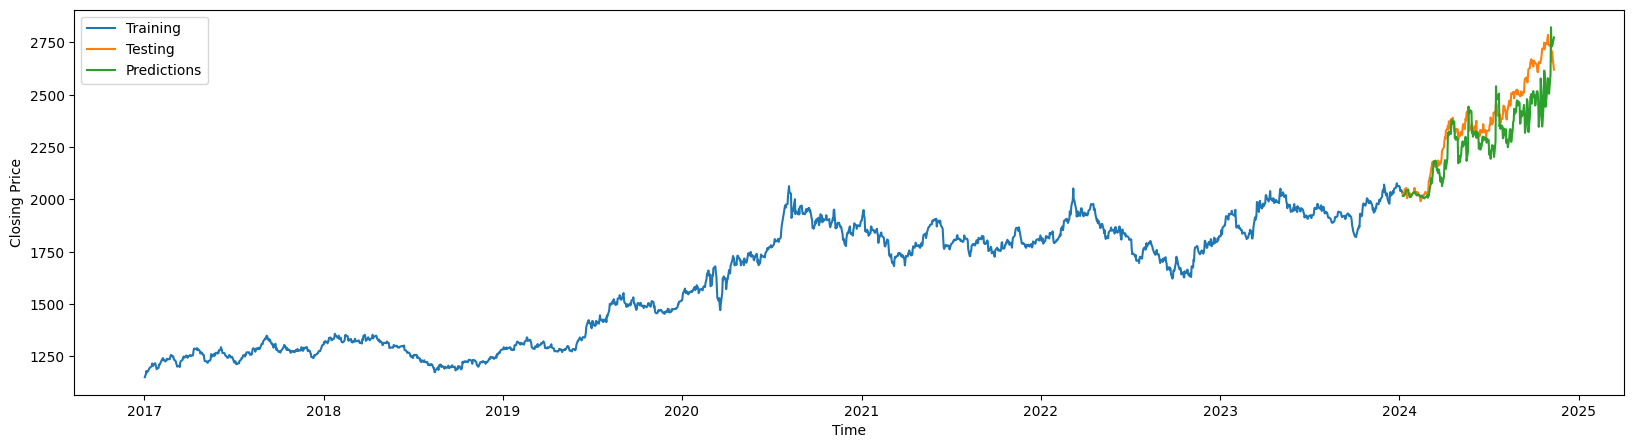

In [146]:
plt.figure(figsize=(20, 5))

# Plot Training Data
plt.plot(
    Gold['Date'][Gold['Date'] < '2024-01-10'], 
    Gold['Adj. Close'][Gold['Date'] < '2024-01-10'], 
    label='Training'
)

# Plot Testing Data
plt.plot(
    Gold['Date'][Gold['Date'] >= '2024-01-06'], 
    Gold['Adj. Close'][Gold['Date'] >= '2024-01-06'], 
    label='Testing'
)

# Plot Predictions (aligned with the testing period)
plt.plot(
    Gold['Date'][Gold['Date'] >= '2024-01-06'], 
    Gold_prediction.reshape(-1), 
    label='Predictions'
)

# Add labels and legend
plt.xlabel('Time')
plt.ylabel('Closing Price')
plt.legend(loc='best')


In [147]:
rmse = math.sqrt(mean_squared_error(Gold_Test_Y.reshape(-1, 5), Gold_prediction))
mape = np.mean(np.abs(Gold_prediction - Gold_Test_Y.reshape(-1, 5))/np.abs(Gold_Test_Y.reshape(-1, 5)))
print(f'RMSE: {rmse}')
print(f'MAPE: {mape}')

RMSE: 94.89805377369329
MAPE: 0.029225111821865903


## IMUS

In [197]:
Imus = pd.read_csv("./1stJan2017 - 11thNov2024/format 2/imus_cleaned.csv")


In [198]:
# %%
def Dataset(Data, Date):

  Train_Data = Data['Adj. Close'][Data['Date'] < Date].to_numpy()
  Data_Train = []
  Data_Train_X = []
  Data_Train_Y = []
  for i in range(0, len(Train_Data), 5):
    try:
      Data_Train.append(Train_Data[i : i + 5])
    except:
      pass

  if len(Data_Train[-1]) < 5:
    Data_Train.pop(-1)
  
  Data_Train_X = Data_Train[0 : -1]
  Data_Train_X = np.array(Data_Train_X)
  Data_Train_X = Data_Train_X.reshape((-1, 5, 1))
  Data_Train_Y = Data_Train[1 : len(Data_Train)]
  Data_Train_Y = np.array(Data_Train_Y)
  Data_Train_Y = Data_Train_Y.reshape((-1, 5, 1))


  Test_Data = Data['Adj. Close'][Data['Date'] >= Date].to_numpy()
  Data_Test = []
  Data_Test_X = []
  Data_Test_Y = []
  for i in range(0, len(Test_Data), 5):
    try:
      Data_Test.append(Test_Data[i : i + 5])
    except:
      pass

  if len(Data_Test[-1]) < 5:
    Data_Test.pop(-1)
  
  Data_Test_X = Data_Test[0 : -1]
  Data_Test_X = np.array(Data_Test_X)
  Data_Test_X = Data_Test_X.reshape((-1, 5, 1))
  Data_Test_Y = Data_Test[1 : len(Data_Test)]
  Data_Test_Y = np.array(Data_Test_Y)
  Data_Test_Y = Data_Test_Y.reshape((-1, 5, 1))

  return Data_Train_X, Data_Train_Y, Data_Test_X, Data_Test_Y


In [199]:

# %% [markdown]
# ### Model

# %%
def Model():
  model = tf.keras.models.Sequential([
                                      tf.keras.layers.LSTM(200, input_shape = (5, 1), activation = tf.nn.leaky_relu, return_sequences = True),
                                      tf.keras.layers.LSTM(200, activation = tf.nn.leaky_relu),
                                      tf.keras.layers.Dense(200, activation = tf.nn.leaky_relu),
                                      tf.keras.layers.Dense(100, activation = tf.nn.leaky_relu),
                                      tf.keras.layers.Dense(50, activation = tf.nn.leaky_relu),
                                      tf.keras.layers.Dense(5, activation = tf.nn.leaky_relu)
                                      ])
  return model


In [200]:
# %%
model = Model()

# %%
tf.keras.utils.plot_model(model, show_shapes=True)

# %%
model.summary()

You must install pydot (`pip install pydot`) for `plot_model` to work.


Model: "sequential_15"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_30 (LSTM)                  │ (None, 5, 200)         │       161,600 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_31 (LSTM)                  │ (None, 200)            │       320,800 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_60 (Dense)                │ (None, 200)            │        40,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_61 (Dense)                │ (None, 100)            │        20,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_62 (Dense)                │ (None, 50)             │         5,050 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_63 (Dense)                │ (None, 5)              │           255 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 548,005 (2.09 MB)

 Trainable params: 548,005 (2.09 MB)

 Non-trainable params: 0 (0.00 B)

In [201]:
# %%
def scheduler(epoch):
  
  if epoch <= 150:
    lrate = (10 ** -5) * (epoch / 150) 
  elif epoch <= 400:
    initial_lrate = (10 ** -5)
    k = 0.01
    lrate = initial_lrate * math.exp(-k * (epoch - 150))
  else:
    lrate = (10 ** -6)
  
  return lrate


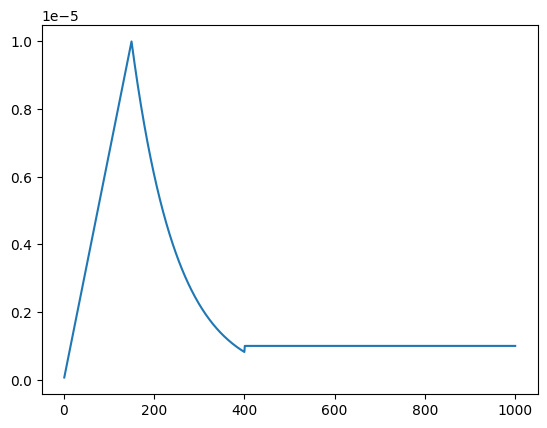

In [202]:
# %%
epochs = [i for i in range(1, 1001, 1)]
lrate = [scheduler(i) for i in range(1, 1001, 1)]
plt.plot(epochs, lrate)


In [203]:
# %%
callback = tf.keras.callbacks.LearningRateScheduler(scheduler)


In [204]:
# %%
Imus.head()


,Date,Close,Open,High,Low,Vol.,Change %,Adj. Close
0,2024-11-11,12191.97,12212.18,12238.65,12148.74,NaN,-0.17%,12191.97
1,2024-11-08,12212.18,12188.70,12243.33,12182.94,NaN,0.19%,12212.18
2,2024-11-07,12188.70,12031.13,12207.79,12031.13,NaN,1.31%,12188.70
3,2024-11-06,12031.13,11771.58,12045.91,11771.58,NaN,2.20%,12031.13
4,2024-11-05,11771.58,11627.08,11773.35,11627.08,NaN,1.24%,11771.58


In [205]:
Imus.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1995 entries, 0 to 1994
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Date        1995 non-null   object 
 1   Close       1995 non-null   float64
 2   Open        1995 non-null   float64
 3   High        1995 non-null   float64
 4   Low         1995 non-null   float64
 5   Vol.        0 non-null      float64
 6   Change %    1995 non-null   object 
 7   Adj. Close  1995 non-null   float64
dtypes: float64(6), object(2)
memory usage: 124.8+ KB


In [206]:
# Change Dtype of Date column
Imus["Date"] = pd.to_datetime(Imus["Date"])

In [207]:

Imus_Date = '2024-01-01'
Imus_Train_X, Imus_Train_Y, Imus_Test_X, Imus_Test_Y = Dataset(Imus, Imus_Date)


In [208]:
# %%
Imus_Model = Model()


In [209]:
# %%
Imus_Model.compile(
    optimizer=tf.keras.optimizers.Adam(),
    loss='mse',
    metrics=[tf.keras.metrics.RootMeanSquaredError()]  # Wrap it in a list
)


In [210]:
# %%
Imus_hist = Imus_Model.fit(Imus_Train_X, Imus_Train_Y, epochs = 1000, validation_data = (Imus_Test_X, Imus_Test_Y), callbacks=[callback])


Epoch 1/1000
12/12 ━━━━━━━━━━━━━━━━━━━━ 7s 91ms/step - loss: 46701144.0000 - root_mean_squared_error: 6833.6450 - val_loss: 118631168.0000 - val_root_mean_squared_error: 10891.7939 - learning_rate: 0.0000e+00
Epoch 2/1000
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 45597784.0000 - root_mean_squared_error: 6750.8647 - val_loss: 118628400.0000 - val_root_mean_squared_error: 10891.6670 - learning_rate: 6.6667e-08
Epoch 3/1000
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 46208276.0000 - root_mean_squared_error: 6797.5337 - val_loss: 118622840.0000 - val_root_mean_squared_error: 10891.4111 - learning_rate: 1.3333e-07
Epoch 4/1000
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 46475656.0000 - root_mean_squared_error: 6816.7285 - val_loss: 118614088.0000 - val_root_mean_squared_error: 10891.0098 - learning_rate: 2.0000e-07
Epoch 5/1000
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 45010976.0000 - root_mean_squared_error: 6708.2061 - val_loss: 118601080.0000 - val_root_mean_squared_e

In [211]:
# %%
history_dict = Imus_hist.history

loss = history_dict["loss"]
root_mean_squared_error = history_dict["root_mean_squared_error"]
val_loss = history_dict["val_loss"]
val_root_mean_squared_error = history_dict["val_root_mean_squared_error"]

epochs = range(1, len(loss) + 1)


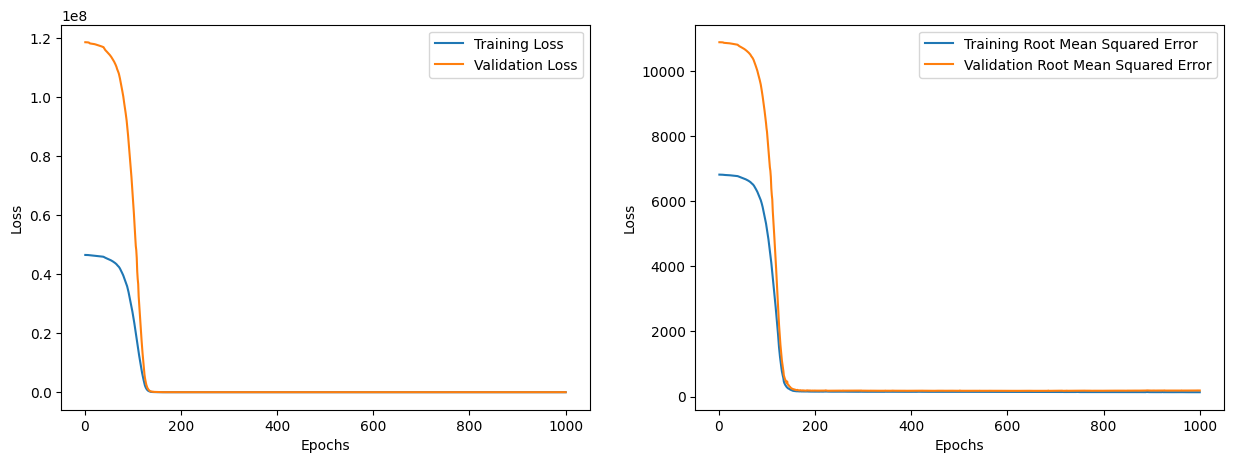

In [212]:
# %%
fig, (ax1, ax2) = plt.subplots(1, 2)

fig.set_figheight(5)
fig.set_figwidth(15)

ax1.plot(epochs, loss, label = 'Training Loss')
ax1.plot(epochs, val_loss, label = 'Validation Loss')
ax1.set(xlabel = "Epochs", ylabel = "Loss")
ax1.legend()

ax2.plot(epochs, root_mean_squared_error, label = "Training Root Mean Squared Error")
ax2.plot(epochs, val_root_mean_squared_error, label = "Validation Root Mean Squared Error")
ax2.set(xlabel = "Epochs", ylabel = "Loss")
ax2.legend()

plt.show()


In [213]:
# %% [markdown]
# ### Predicting the closing stock price of Apple

# %%
Imus_prediction = Imus_Model.predict(Imus_Test_X)

# %%
print("Shape of x (dates):", testing_dates.shape)
print("Shape of y (predictions):", Imus_prediction.shape)


2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 429ms/step
Shape of x (dates): (44,)
Shape of y (predictions): (42, 5)


In [214]:
# %%
print("Shape of Imus_Test_X:", Imus_Test_X.shape)
print("Shape of Imus_prediction:", Imus_prediction.shape)


Shape of Imus_Test_X: (42, 5, 1)
Shape of Imus_prediction: (42, 5)


In [215]:
# %%
print(Imus['Date'][Imus['Date'] >= '2024-01-12'].shape)
print(Imus_prediction.reshape(-1).shape)


(210,)
(210,)


(214,)
(210,)


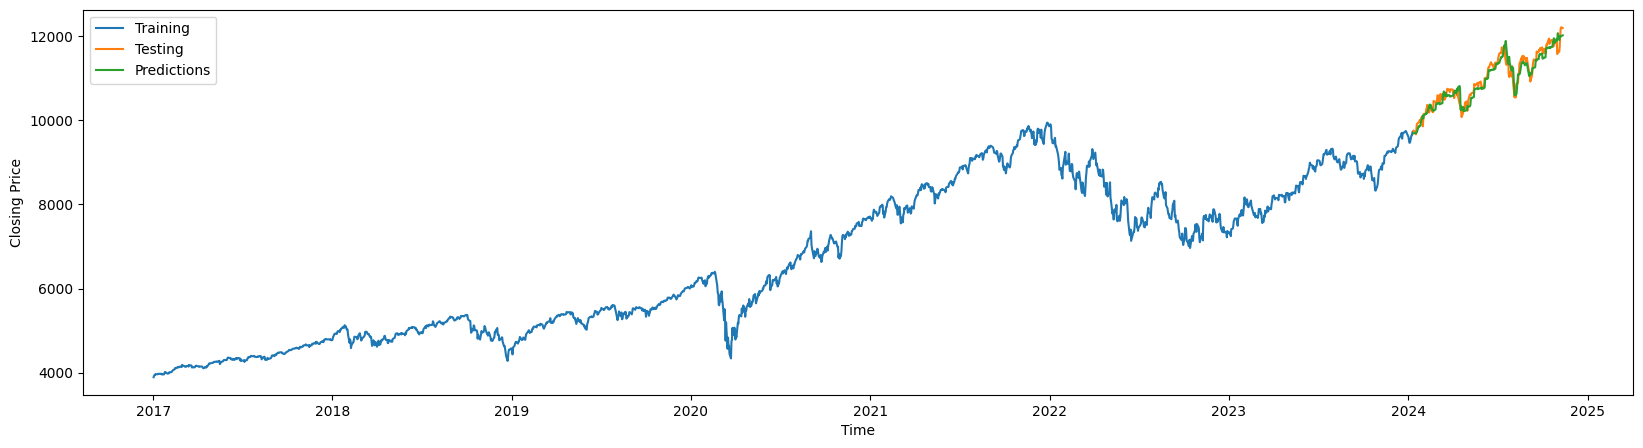

In [216]:

# %%
print(Imus['Date'][Imus['Date'] >= '2024-01-06'].shape)
print(Imus_prediction.reshape(-1).shape)


# %%
plt.figure(figsize=(20, 5))

# Plot Training Data
plt.plot(
    Imus['Date'][Imus['Date'] < '2024-01-15'], 
    Imus['Adj. Close'][Imus['Date'] < '2024-01-15'], 
    label='Training'
)

# Plot Testing Data
plt.plot(
    Imus['Date'][Imus['Date'] >= '2024-01-12'], 
    Imus['Adj. Close'][Imus['Date'] >= '2024-01-12'], 
    label='Testing'
)

# Plot Predictions (aligned with the testing period)
plt.plot(
    Imus['Date'][Imus['Date'] >= '2024-01-12'], 
    Imus_prediction.reshape(-1), 
    label='Predictions'
)

# Add labels and legend
plt.xlabel('Time')
plt.ylabel('Closing Price')
plt.legend(loc='best')


In [217]:
# %%
rmse = math.sqrt(mean_squared_error(Imus_Test_Y.reshape(-1, 5), Imus_prediction))
mape = np.mean(np.abs(Imus_prediction - Imus_Test_Y.reshape(-1, 5))/np.abs(Imus_Test_Y.reshape(-1, 5)))
print(f'RMSE: {rmse}')
print(f'MAPE: {mape}')

# %% [markdown]
# ## IMUS

RMSE: 185.86310778816426
MAPE: 0.012923886324019975


You must install pydot (`pip install pydot`) for `plot_model` to work.


Model: "sequential_20"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_40 (LSTM)                  │ (None, 5, 200)         │       161,600 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_41 (LSTM)                  │ (None, 200)            │       320,800 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_80 (Dense)                │ (None, 200)            │        40,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_81 (Dense)                │ (None, 100)            │        20,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_82 (Dense)                │ (None, 50)             │         5,050 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_83 (Dense)                │ (None, 5)              │           255 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 548,005 (2.09 MB)

 Trainable params: 548,005 (2.09 MB)

 Non-trainable params: 0 (0.00 B)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1977 entries, 0 to 1976
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Date          1977 non-null   object 
 1   Open          1977 non-null   float64
 2   High          1977 non-null   float64
 3   Low           1977 non-null   float64
 4   Close         1977 non-null   float64
 5   Volume        1977 non-null   int64  
 6   Dividends     1977 non-null   float64
 7   Stock Splits  1977 non-null   float64
 8   Adj. Close    1977 non-null   float64
dtypes: float64(7), int64(1), object(1)
memory usage: 139.1+ KB
Epoch 1/1000
11/11 ━━━━━━━━━━━━━━━━━━━━ 7s 86ms/step - loss: 239519.7344 - root_mean_squared_error: 489.3451 - val_loss: 311520.0938 - val_root_mean_squared_error: 558.1398 - learning_rate: 0.0000e+00
Epoch 2/1000
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 238267.5156 - root_mean_squared_error: 488.0350 - val_loss: 311511.4375 - val_root_mean_squared

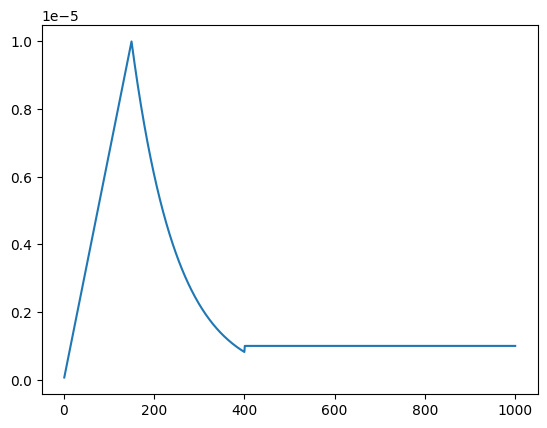

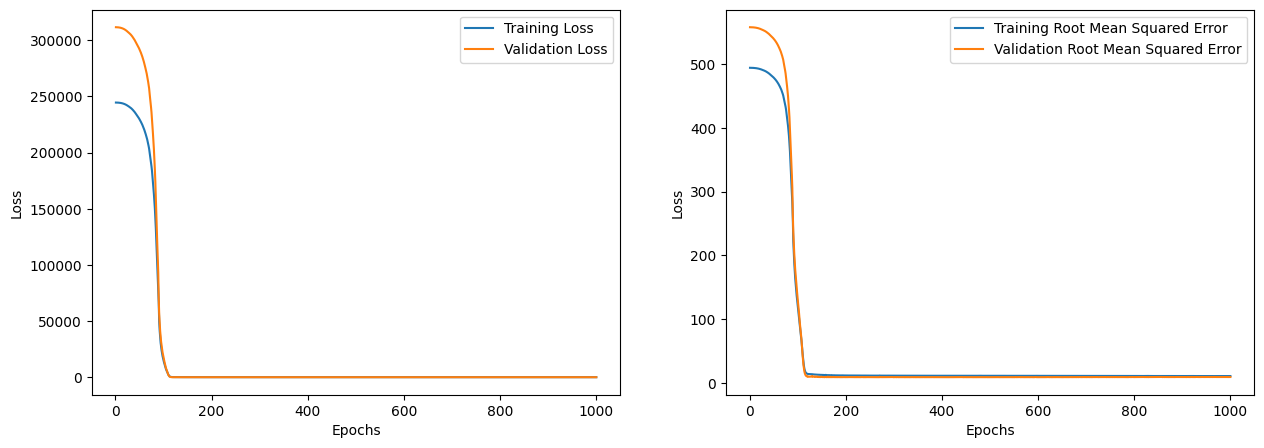

2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 375ms/step
Shape of x (dates): (44,)
Shape of y (predictions): (42, 5)
Shape of GSCI_Test_X: (42, 5, 1)
Shape of GSCI_prediction: (42, 5)
(209,)
(210,)
(213,)
(210,)


ValueError: x and y must have same first dimension, but have shapes (209,) and (210,)

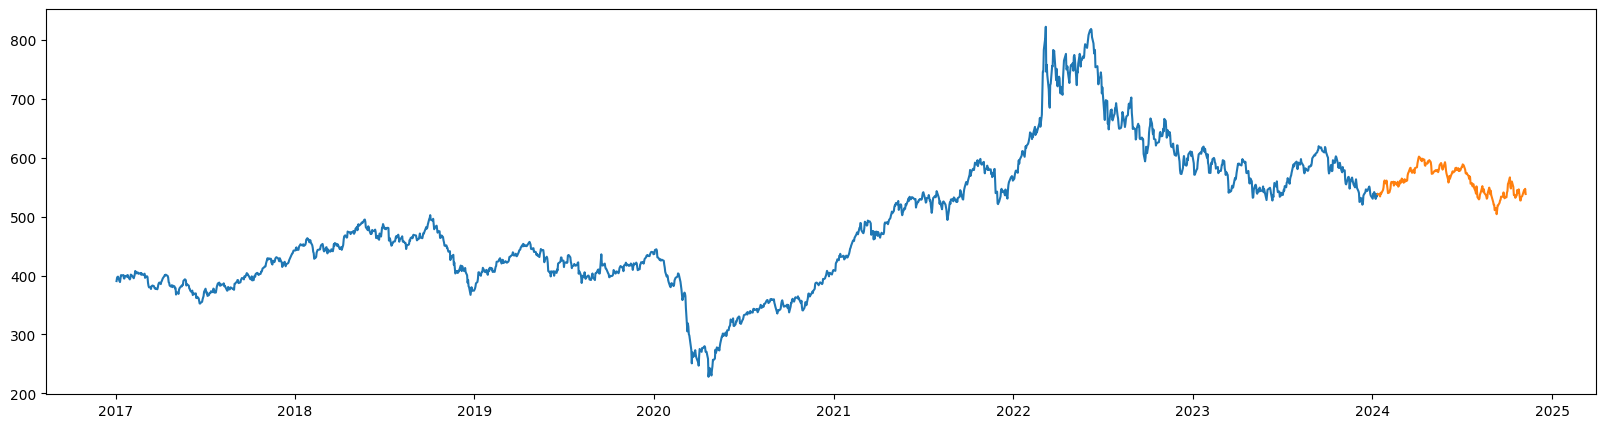

In [ ]:

# %%
GSCI = pd.read_csv("./1stJan2017 - 11thNov2024/format 2/GSCIfinaleFormatted2.csv")


# %%
# %%
def Dataset(Data, Date):

  Train_Data = Data['Adj. Close'][Data['Date'] < Date].to_numpy()
  Data_Train = []
  Data_Train_X = []
  Data_Train_Y = []
  for i in range(0, len(Train_Data), 5):
    try:
      Data_Train.append(Train_Data[i : i + 5])
    except:
      pass

  if len(Data_Train[-1]) < 5:
    Data_Train.pop(-1)
  
  Data_Train_X = Data_Train[0 : -1]
  Data_Train_X = np.array(Data_Train_X)
  Data_Train_X = Data_Train_X.reshape((-1, 5, 1))
  Data_Train_Y = Data_Train[1 : len(Data_Train)]
  Data_Train_Y = np.array(Data_Train_Y)
  Data_Train_Y = Data_Train_Y.reshape((-1, 5, 1))


  Test_Data = Data['Adj. Close'][Data['Date'] >= Date].to_numpy()
  Data_Test = []
  Data_Test_X = []
  Data_Test_Y = []
  for i in range(0, len(Test_Data), 5):
    try:
      Data_Test.append(Test_Data[i : i + 5])
    except:
      pass

  if len(Data_Test[-1]) < 5:
    Data_Test.pop(-1)
  
  Data_Test_X = Data_Test[0 : -1]
  Data_Test_X = np.array(Data_Test_X)
  Data_Test_X = Data_Test_X.reshape((-1, 5, 1))
  Data_Test_Y = Data_Test[1 : len(Data_Test)]
  Data_Test_Y = np.array(Data_Test_Y)
  Data_Test_Y = Data_Test_Y.reshape((-1, 5, 1))

  return Data_Train_X, Data_Train_Y, Data_Test_X, Data_Test_Y


# %%

# %% [markdown]
# ### Model

# %%
def Model():
  model = tf.keras.models.Sequential([
                                      tf.keras.layers.LSTM(200, input_shape = (5, 1), activation = tf.nn.leaky_relu, return_sequences = True),
                                      tf.keras.layers.LSTM(200, activation = tf.nn.leaky_relu),
                                      tf.keras.layers.Dense(200, activation = tf.nn.leaky_relu),
                                      tf.keras.layers.Dense(100, activation = tf.nn.leaky_relu),
                                      tf.keras.layers.Dense(50, activation = tf.nn.leaky_relu),
                                      tf.keras.layers.Dense(5, activation = tf.nn.leaky_relu)
                                      ])
  return model


# %%
# %%
model = Model()

# %%
tf.keras.utils.plot_model(model, show_shapes=True)

# %%
model.summary()

# %%
# %%
def scheduler(epoch):
  
  if epoch <= 150:
    lrate = (10 ** -5) * (epoch / 150) 
  elif epoch <= 400:
    initial_lrate = (10 ** -5)
    k = 0.01
    lrate = initial_lrate * math.exp(-k * (epoch - 150))
  else:
    lrate = (10 ** -6)
  
  return lrate


# %%
# %%
epochs = [i for i in range(1, 1001, 1)]
lrate = [scheduler(i) for i in range(1, 1001, 1)]
plt.plot(epochs, lrate)


# %%
# %%
callback = tf.keras.callbacks.LearningRateScheduler(scheduler)


# %%
# %%
GSCI.head()


# %%
GSCI.info()

# %%
# Change Dtype of Date column
GSCI["Date"] = pd.to_datetime(GSCI["Date"])

# %%

GSCI_Date = '2024-01-01'
GSCI_Train_X, GSCI_Train_Y, GSCI_Test_X, GSCI_Test_Y = Dataset(GSCI, GSCI_Date)


# %%
# %%
GSCI_Model = Model()


# %%
# %%
GSCI_Model.compile(
    optimizer=tf.keras.optimizers.Adam(),
    loss='mse',
    metrics=[tf.keras.metrics.RootMeanSquaredError()]  # Wrap it in a list
)


# %%
# %%
GSCI_hist = GSCI_Model.fit(GSCI_Train_X, GSCI_Train_Y, epochs = 1000, validation_data = (GSCI_Test_X, GSCI_Test_Y), callbacks=[callback])


# %%
# %%
history_dict = GSCI_hist.history

loss = history_dict["loss"]
root_mean_squared_error = history_dict["root_mean_squared_error"]
val_loss = history_dict["val_loss"]
val_root_mean_squared_error = history_dict["val_root_mean_squared_error"]

epochs = range(1, len(loss) + 1)


# %%
# %%
fig, (ax1, ax2) = plt.subplots(1, 2)

fig.set_figheight(5)
fig.set_figwidth(15)

ax1.plot(epochs, loss, label = 'Training Loss')
ax1.plot(epochs, val_loss, label = 'Validation Loss')
ax1.set(xlabel = "Epochs", ylabel = "Loss")
ax1.legend()

ax2.plot(epochs, root_mean_squared_error, label = "Training Root Mean Squared Error")
ax2.plot(epochs, val_root_mean_squared_error, label = "Validation Root Mean Squared Error")
ax2.set(xlabel = "Epochs", ylabel = "Loss")
ax2.legend()

plt.show()


# %%
# %% [markdown]
# ### Predicting the closing stock price of Apple

# %%
GSCI_prediction = GSCI_Model.predict(GSCI_Test_X)

# %%
print("Shape of x (dates):", testing_dates.shape)
print("Shape of y (predictions):", GSCI_prediction.shape)


# %%
# %%
print("Shape of GSCI_Test_X:", GSCI_Test_X.shape)
print("Shape of GSCI_prediction:", GSCI_prediction.shape)


# %%
# %%
print(GSCI['Date'][GSCI['Date'] >= '2024-01-12'].shape)
print(GSCI_prediction.reshape(-1).shape)




# %% [markdown]
# ## GSCI




In [224]:
# %%

# %%
print(GSCI['Date'][GSCI['Date'] >= '2024-01-11'].shape)
print(GSCI_prediction.reshape(-1).shape)




(210,)
(210,)


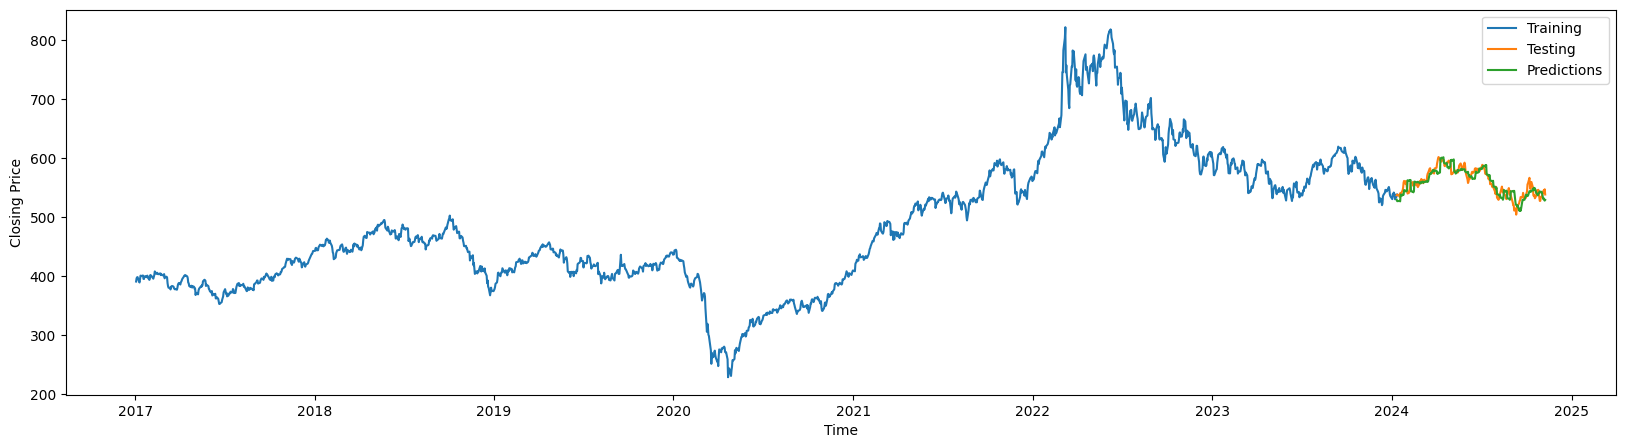

In [225]:
# %%
plt.figure(figsize=(20, 5))

# Plot Training Data
plt.plot(
    GSCI['Date'][GSCI['Date'] < '2024-01-15'], 
    GSCI['Adj. Close'][GSCI['Date'] < '2024-01-15'], 
    label='Training'
)

# Plot Testing Data
plt.plot(
    GSCI['Date'][GSCI['Date'] >= '2024-01-11'], 
    GSCI['Adj. Close'][GSCI['Date'] >= '2024-01-11'], 
    label='Testing'
)

# Plot Predictions (aligned with the testing period)
plt.plot(
    GSCI['Date'][GSCI['Date'] >= '2024-01-11'], 
    GSCI_prediction.reshape(-1), 
    label='Predictions'
)

# Add labels and legend
plt.xlabel('Time')
plt.ylabel('Closing Price')
plt.legend(loc='best')


# %%


In [226]:
# %%
rmse = math.sqrt(mean_squared_error(GSCI_Test_Y.reshape(-1, 5), GSCI_prediction))
mape = np.mean(np.abs(GSCI_prediction - GSCI_Test_Y.reshape(-1, 5))/np.abs(GSCI_Test_Y.reshape(-1, 5)))
print(f'RMSE: {rmse}')
print(f'MAPE: {mape}')

RMSE: 9.132907326618833
MAPE: 0.012929002067243598
